# SymptoCare: Empowering Health, Simplifying Care
## Symptom Triage AI

In [1]:
#Importing Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv("Dataset/training.csv")

In [3]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
DF= pd.read_csv('Dataset/training.csv', index_col='prognosis')

In [5]:
DF

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
Urinary tract infection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
symptoms_list = df.columns.tolist()
symptoms_list = symptoms_list[:-1]
symptoms_list

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [7]:
len(symptoms_list)

132

In [8]:
disease_list = df['prognosis'].unique().tolist()
disease_list

['Fungal infection',
 'Allergy',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Heart attack',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Psoriasis',
 'Impetigo']

In [9]:
len(disease_list)

41

In [10]:
l2=[]
for i in range(len(symptoms_list)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
prognosis_mapping = {value: idx for idx, value in enumerate(disease_list)}

df.replace({'prognosis': prognosis_mapping}, inplace=True)

df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11284\2209906432.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'prognosis': prognosis_mapping}, inplace=True)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,37
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,39


In [12]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

In [13]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
4915    36
4916    37
4917    38
4918    39
4919    40
Name: prognosis, Length: 4920, dtype: int64

In [15]:
#Reading the  testing.csv file
test_df = pd.read_csv("Dataset/testing.csv")
test_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [16]:
test_df.replace({'prognosis': prognosis_mapping}, inplace=True)
test_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11284\3044813324.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.replace({'prognosis': prognosis_mapping}, inplace=True)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [17]:
X_test = test_df.drop('prognosis', axis=1)
y_test = test_df['prognosis']

In [18]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_test

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
Name: prognosis, dtype: int64

In [20]:
def scatterplt(disea):
    x = DF.loc[disea].sum()  # Sum the symptom occurrences for the disease
    x = x[x > 0]  # Keep only non-zero values
    y = x.index  # Symptom names

    print(x.values)
    print(len(x))
    print(len(y))

    plt.title(disea)
    plt.scatter(y, x.values)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Symptoms')
    plt.tight_layout()
    plt.show()


In [21]:
def scatterinp(sym1, sym2, sym3, sym4, sym5):
    symptoms = [sym1, sym2, sym3, sym4, sym5]
    values = [1 if sym != 'Select Here' else 0 for sym in symptoms]  # Set 1 if symptom is selected, otherwise 0

    print(symptoms)
    print(values)

    plt.scatter(symptoms, values)
    plt.xticks(rotation=90)
    plt.ylabel('Selected')
    plt.xlabel('Symptoms')
    plt.title('Selected Symptoms')
    plt.tight_layout()
    plt.show()


# Machine Learning Algorithms Used
* Decision Tree Algorithm
* Random Forest Algorithm

# Decision Tree Algorithm

In [22]:
# Decison Tree
root = Tk()
pred1=StringVar()
def DecisionTree():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn import tree

        clf3 = tree.DecisionTreeClassifier() 
        clf3 = clf3.fit(X,y)

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf3.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(symptoms_list)):
            for z in psymptoms:
                if(z==symptoms_list[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf3.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease_list)):
            if(predicted == a):
                h='yes'
                break

    
        if (h=='yes'):
            pred1.set(" ")
            pred1.set(disease_list[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        # #Creating the database if not exists named as database.db and creating table if not exists named as DecisionTree using sqlite3 
        # import sqlite3 
        # conn = sqlite3.connect('database.db') 
        # c = conn.cursor() 
        # c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        # c.execute("INSERT INTO DecisionTree(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred1.get()))
        # conn.commit()  
        # c.close() 
        # conn.close()
        
        #printing scatter plot of input symptoms
        #printing scatter plot of disease predicted vs its symptoms
        scatterinp(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get())
        scatterplt(pred1.get())

# Random Forest Algorithm

In [23]:
# RAndom Forest Algorithm
pred2=StringVar()
def randomforest():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X,np.ravel(y))

        # calculating accuracy 
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)
    
        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(symptoms_list)):
            for z in psymptoms:
                if(z==symptoms_list[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease_list)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred2.set(" ")
            pred2.set(disease_list[a])
        else:
            pred2.set(" ")
            pred2.set("Not Found")
        #  #Creating the database if not exists named as database.db and creating table if not exists named as RandomForest using sqlite3
        # import sqlite3 
        # conn = sqlite3.connect('database.db') 
        # c = conn.cursor() 
        # c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        # c.execute("INSERT INTO RandomForest(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred2.get()))
        # conn.commit()  
        # c.close() 
        # conn.close()
        
        #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred2.get())

# Building Graphical User Interface

In [24]:
#Tk class is used to create a root window
root.configure(background='Ivory')
root.title('SymptoCare')
#root.resizable(0,0)

''

In [25]:
Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")

Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")
Name = StringVar()

In [26]:
prev_win=None
def Reset():
    global prev_win

    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    NameEn.delete(first=0,last=100)
    pred1.set(" ")
    pred2.set(" ")
    # pred3.set(" ")
    # pred4.set(" ")
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass

In [27]:
from tkinter import messagebox
def Exit():
    qExit=messagebox.askyesno("System","Do you want to exit the system")
    
    if qExit:
        root.destroy()
        exit()

In [28]:
#Headings for the GUI written at the top of GUI
w2 = Label(root, justify=LEFT, text="Symptom Triage AI", fg="Red", bg="Ivory")
w2.config(font=("Times",30,"bold italic"))
w2.grid(row=1, column=1, columnspan=1, padx=1)
w2 = Label(root, justify=LEFT, text=" ", fg="Red", bg="Ivory")
# w2.config(font=("Times",30,"bold italic"))
w2.grid(row=2, column=1, columnspan=1, padx=1)

In [29]:
#Label for the name
NameLb = Label(root, text="Name of the Patient *", fg="Red", bg="Ivory")
NameLb.config(font=("Times",15,"bold italic"))
NameLb.grid(row=6, column=0, pady=15, sticky=W)

In [30]:
#Creating Labels for the symtoms
S1Lb = Label(root, text="Symptom 1 *", fg="Black", bg="Ivory")
S1Lb.config(font=("Times",15,"bold italic"))
S1Lb.grid(row=7, column=0, pady=10, sticky=W)

S2Lb = Label(root, text="Symptom 2 *", fg="Black", bg="Ivory")
S2Lb.config(font=("Times",15,"bold italic"))
S2Lb.grid(row=8, column=0, pady=10, sticky=W)

S3Lb = Label(root, text="Symptom 3", fg="Black",bg="Ivory")
S3Lb.config(font=("Times",15,"bold italic"))
S3Lb.grid(row=9, column=0, pady=10, sticky=W)

S4Lb = Label(root, text="Symptom 4", fg="Black", bg="Ivory")
S4Lb.config(font=("Times",15,"bold italic"))
S4Lb.grid(row=10, column=0, pady=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="Black", bg="Ivory")
S5Lb.config(font=("Times",15,"bold italic"))
S5Lb.grid(row=11, column=0, pady=10, sticky=W)

In [31]:
#Labels for the different algorithms
lrLb = Label(root, text="DecisionTree", fg="white", bg="red", width = 20)
lrLb.config(font=("Times",15,"bold italic"))
lrLb.grid(row=15, column=0, pady=10,sticky=W)

destreeLb = Label(root, text="RandomForest", fg="black", bg="Orange", width = 20)
destreeLb.config(font=("Times",15,"bold italic"))
destreeLb.grid(row=17, column=0, pady=10, sticky=W)

# ranfLb = Label(root, text="NaiveBayes", fg="White", bg="green", width = 20)
# ranfLb.config(font=("Times",15,"bold italic"))
# ranfLb.grid(row=19, column=0, pady=10, sticky=W)

# knnLb = Label(root, text="kNearestNeighbour", fg="Red", bg="Sky Blue", width = 20)
# knnLb.config(font=("Times",15,"bold italic"))
# knnLb.grid(row=21, column=0, pady=10, sticky=W)
OPTIONS = sorted(symptoms_list)

In [32]:
#Taking name as input from user
NameEn = Entry(root, textvariable=Name)
NameEn.grid(row=6, column=1)

#Taking Symptoms as input from the dropdown from the user
S1 = OptionMenu(root, Symptom1,*OPTIONS)
S1.grid(row=7, column=1)

S2 = OptionMenu(root, Symptom2,*OPTIONS)
S2.grid(row=8, column=1)

S3 = OptionMenu(root, Symptom3,*OPTIONS)
S3.grid(row=9, column=1)

S4 = OptionMenu(root, Symptom4,*OPTIONS)
S4.grid(row=10, column=1)

S5 = OptionMenu(root, Symptom5,*OPTIONS)
S5.grid(row=11, column=1)

In [33]:
#Buttons for predicting the disease using different algorithms
dst = Button(root, text="Prediction 1", command=DecisionTree,bg="red",fg="white")
dst.config(font=("Times",15,"bold italic"))
dst.grid(row=8, column=3,padx=10)

rnf = Button(root, text="Prediction 2", command=randomforest,bg="orange",fg="black")
rnf.config(font=("Times",15,"bold italic"))
rnf.grid(row=9, column=3,padx=10)

# lr = Button(root, text="Prediction 3", command=NaiveBayes,bg="Blue",fg="white")
# lr.config(font=("Times",15,"bold italic"))
# lr.grid(row=8, column=3,padx=10)

# kn = Button(root, text="Prediction 4", command=KNN,bg="sky blue",fg="red")
# kn.config(font=("Times",15,"bold italic"))
# kn.grid(row=9, column=3,padx=10)

rs = Button(root,text="Reset Inputs", command=Reset,bg="yellow",fg="purple",width=15)
rs.config(font=("Times",15,"bold italic"))
rs.grid(row=10,column=3,padx=10)

ex = Button(root,text="Exit System", command=Exit,bg="yellow",fg="purple",width=15)
ex.config(font=("Times",15,"bold italic"))
ex.grid(row=11,column=3,padx=10)

In [34]:
#Showing the output of different aldorithms
t1=Label(root,font=("Times",15,"bold italic"),text="Decision Tree",height=1,bg="red"
         ,width=40,fg="white",textvariable=pred1,relief="sunken").grid(row=15, column=1, padx=10)

t2=Label(root,font=("Times",15,"bold italic"),text="Random Forest",height=1,bg="orange"
         ,width=40,fg="black",textvariable=pred2,relief="sunken").grid(row=17, column=1, padx=10)

# t3=Label(root,font=("Times",15,"bold italic"),text="Naive Bayes",height=1,bg="red"
#          ,width=40,fg="orange",textvariable=pred3,relief="sunken").grid(row=19, column=1, padx=10)

# t4=Label(root,font=("Times",15,"bold italic"),text="kNearest Neighbour",height=1,bg="Blue"
#          ,width=40,fg="yellow",textvariable=pred4,relief="sunken").grid(row=21, column=1, padx=10)

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['cold_hands_and_feets', 'fast_heart_rate', 'high_fever', 'fatigue', 'headache']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


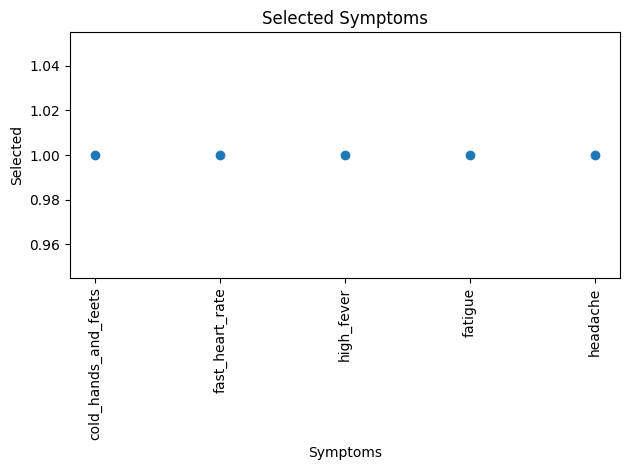

[114 114 114 114 114 114 114 114 120 120 120]
11
11


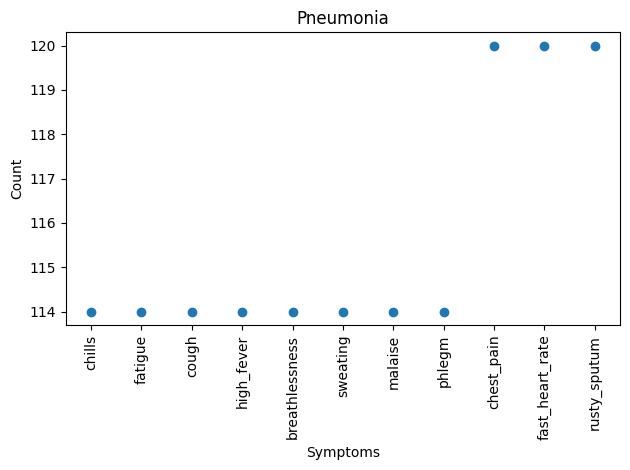

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[114 114 114 114 114 114 114 114 120 120 120]
11
11


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


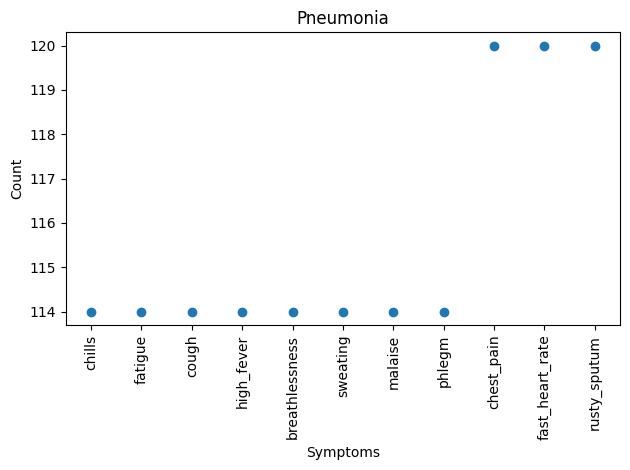

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['cold_hands_and_feets', 'fast_heart_rate', 'high_fever', 'fatigue', 'headache']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


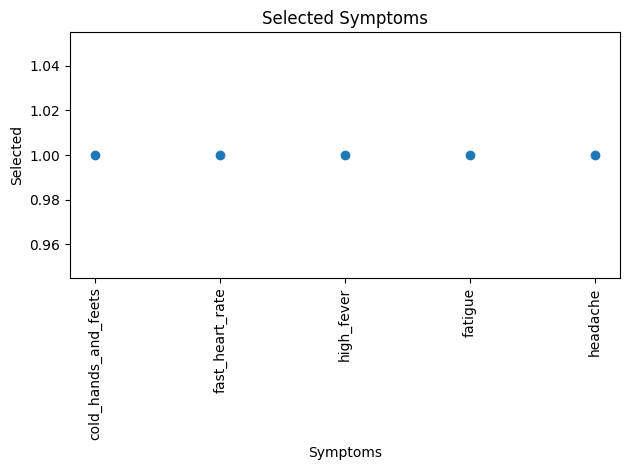

[114 114 114 114 114 114 114 114 120 120 120]
11
11


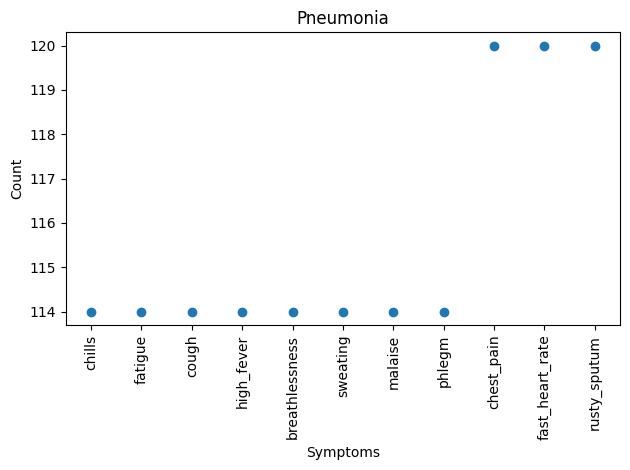

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['cold_hands_and_feets', 'fast_heart_rate', 'high_fever', 'fatigue', 'headache']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


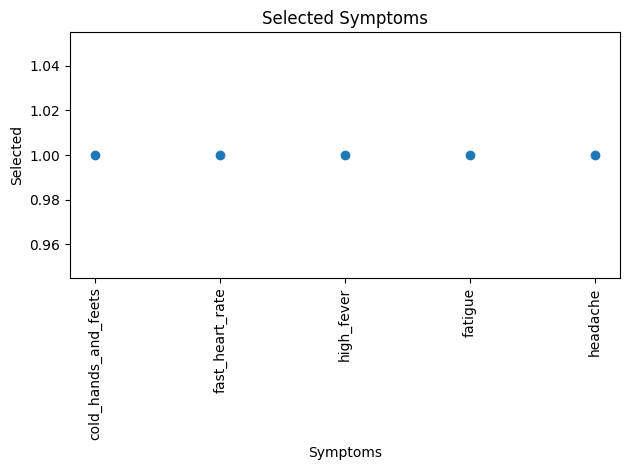

[114 114 114 114 114 114 114 114 120 120 120]
11
11


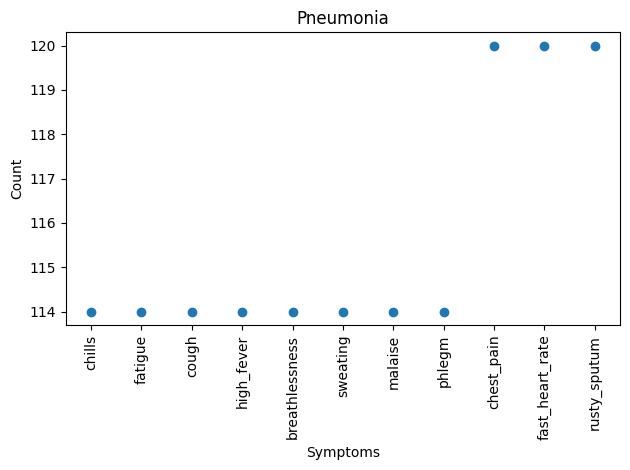

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[114 114 114 114 114 114 114 114 120 120 120]
11
11


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


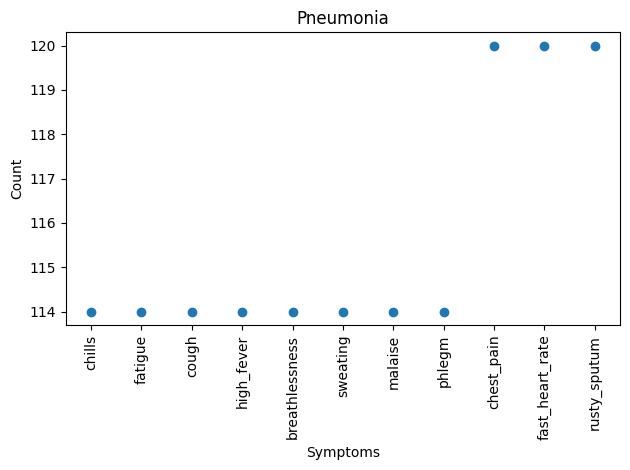

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[108 108 114 114 114 114]
6
6


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


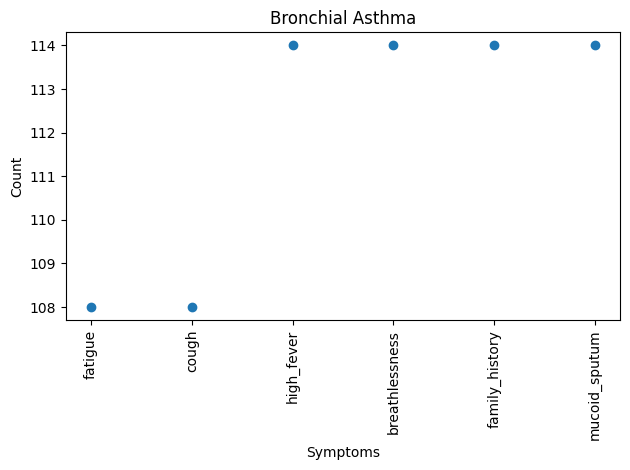

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['cold_hands_and_feets', 'fast_heart_rate', 'high_fever', 'fatigue', 'headache']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


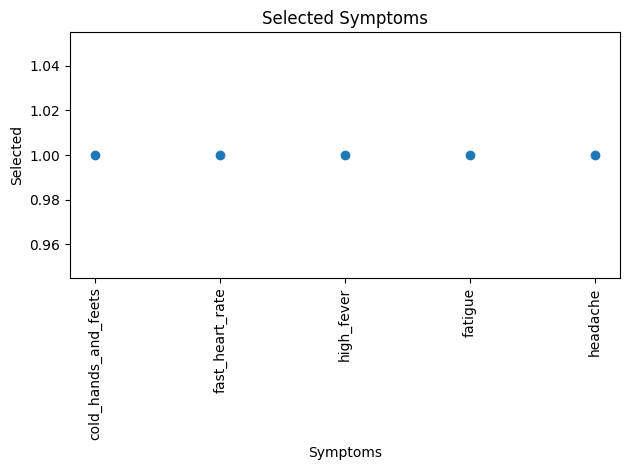

[108 108 114 108]
4
4


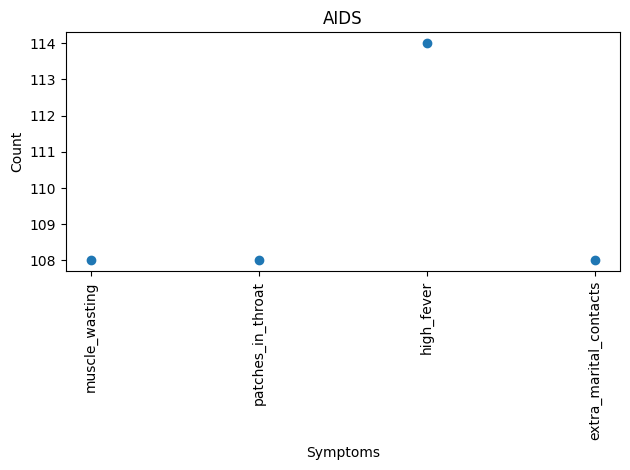

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['cold_hands_and_feets', 'fast_heart_rate', 'high_fever', 'fatigue', 'headache']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


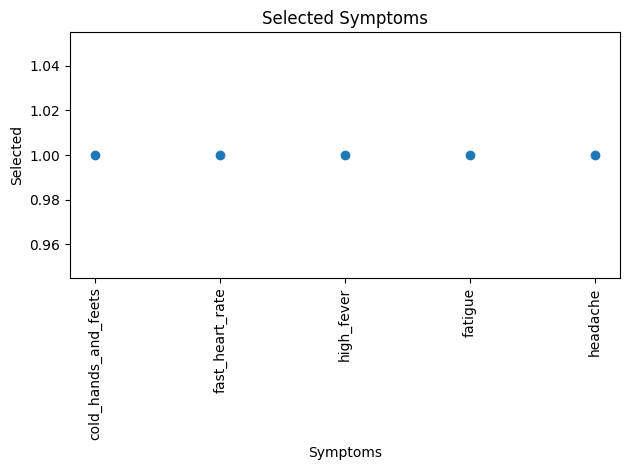

[108 108 114 108]
4
4


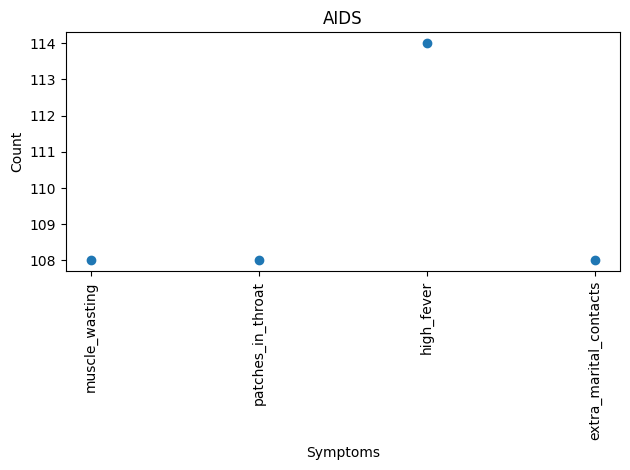

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['cold_hands_and_feets', 'fast_heart_rate', 'high_fever', 'fatigue', 'headache']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


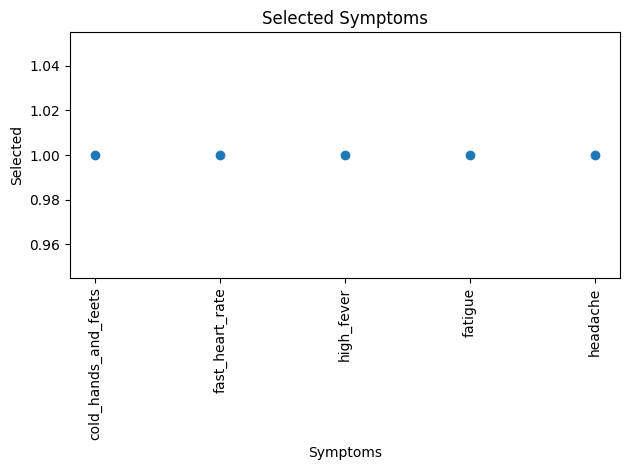

[108 108 114 108]
4
4


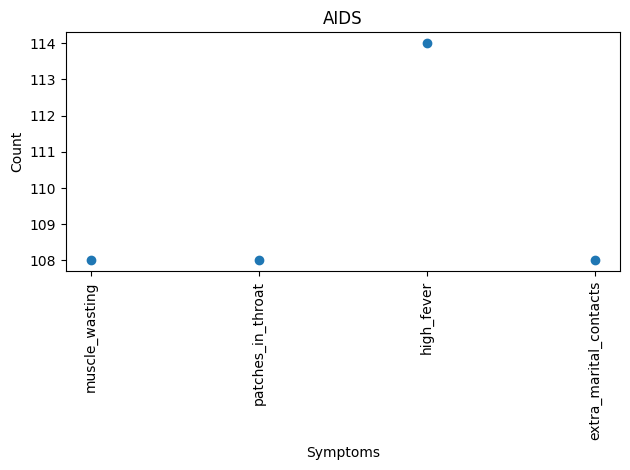

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['cold_hands_and_feets', 'fast_heart_rate', 'high_fever', 'fatigue', 'headache']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


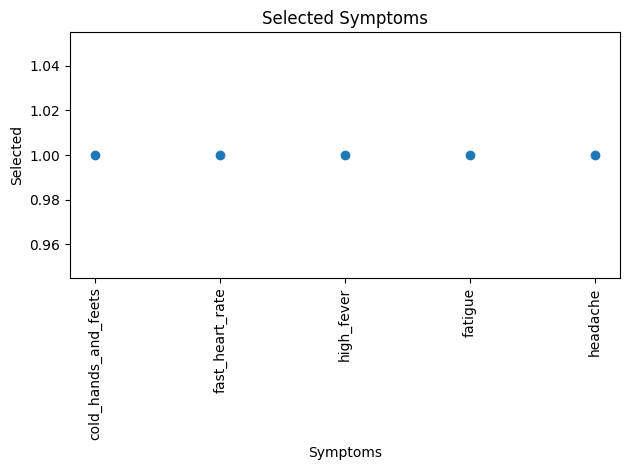

[114 114 114 114 114 114 114 114 120 120 120]
11
11


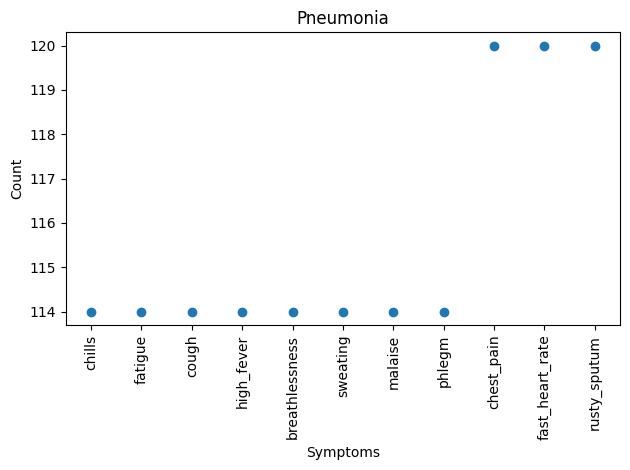

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['back_pain', 'joint_pain', 'muscle_pain', 'hip_joint_pain', 'stiff_neck']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


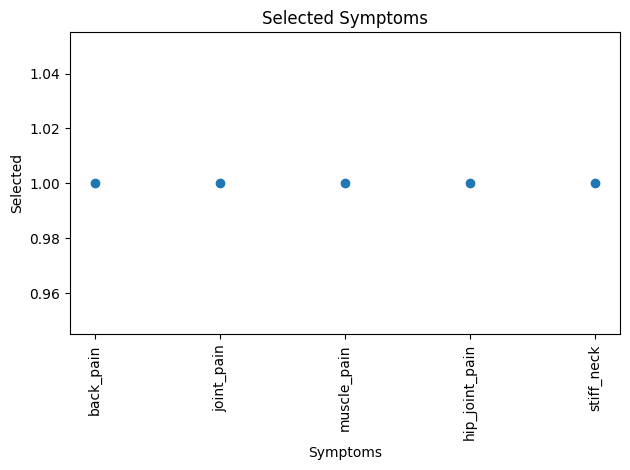

[114 114 114 114 114 114 108 120]
8
8


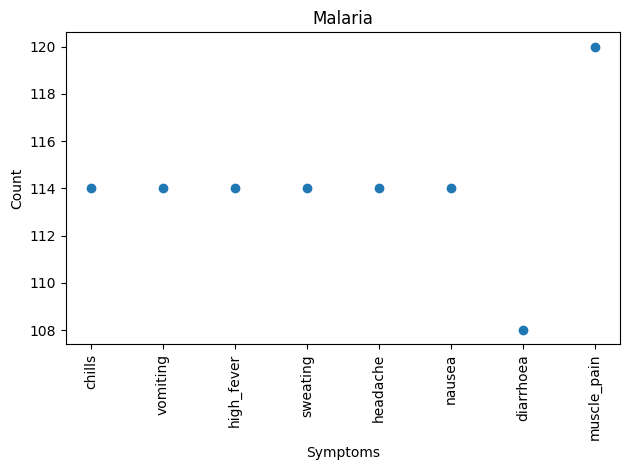

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[114 114 114 114 114 114 108 120]
8
8


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


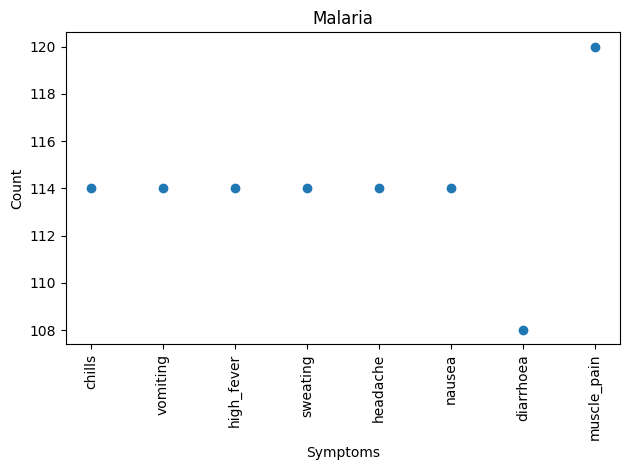

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['back_pain', 'joint_pain', 'muscle_pain', 'hip_joint_pain', 'stiff_neck']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


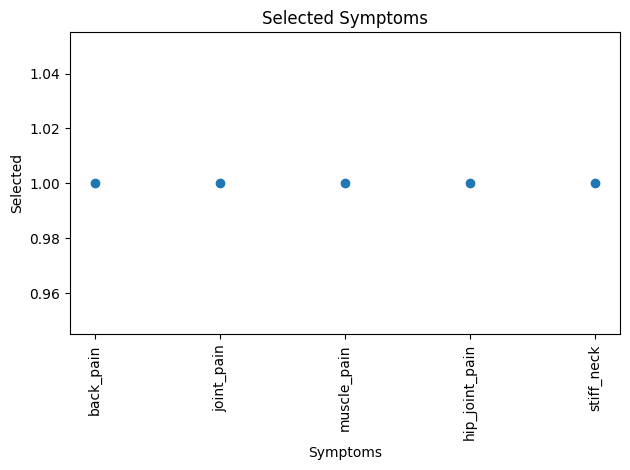

[114 114 114 114 114 114 108 120]
8
8


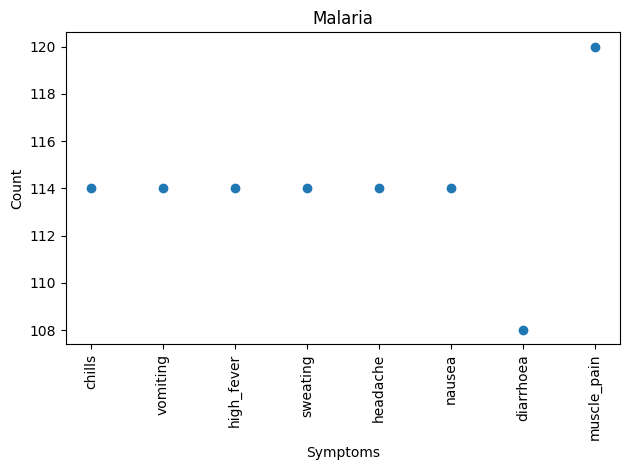

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[114 114 114 114 114 114 108 120]
8
8


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


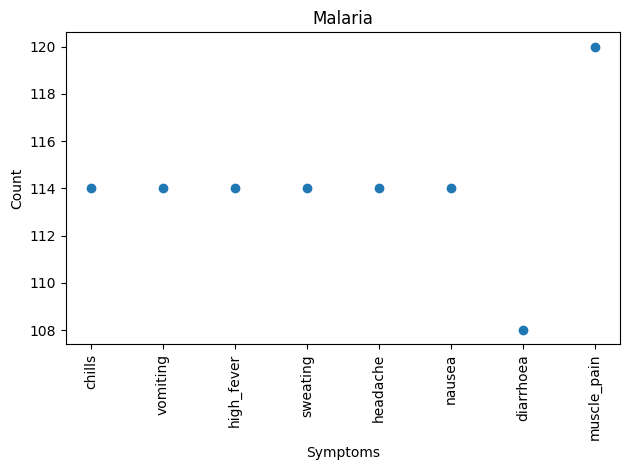

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[114 114 114 114 114 114 108 120]
8
8


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


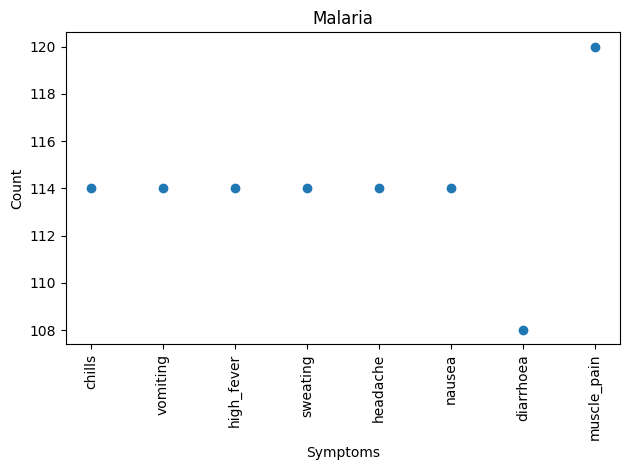

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['back_pain', 'joint_pain', 'muscle_pain', 'hip_joint_pain', 'stiff_neck']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


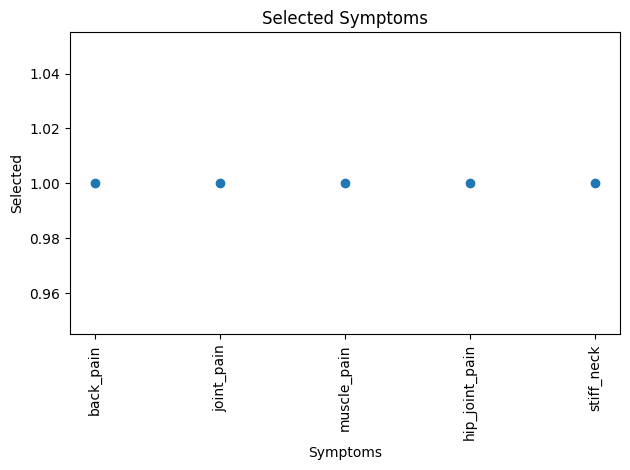

[114 114 114 114 114 114 108 120]
8
8


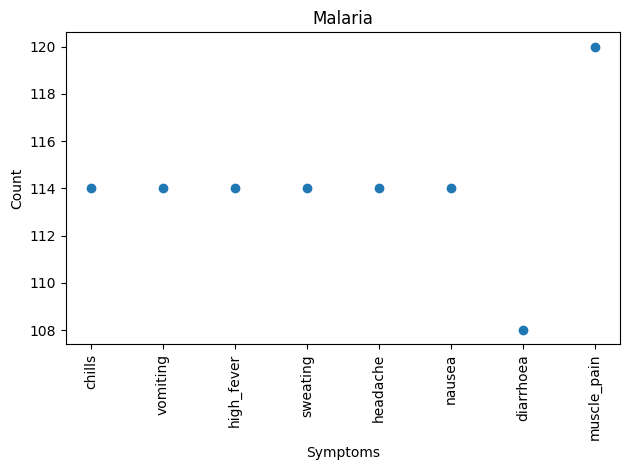

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['back_pain', 'joint_pain', 'muscle_pain', 'hip_joint_pain', 'stiff_neck']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


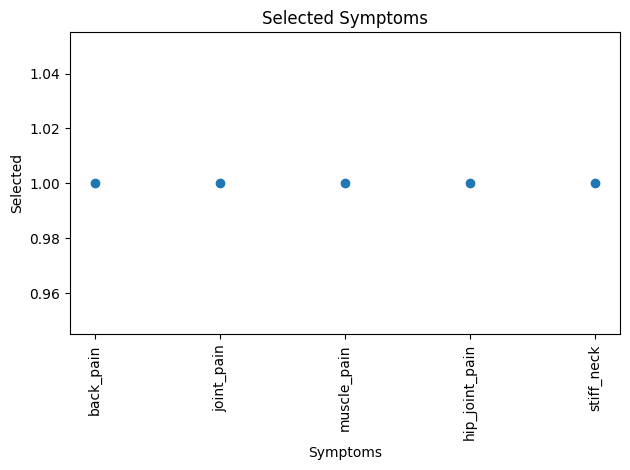

[114 114 114 114 114 114 108 120]
8
8


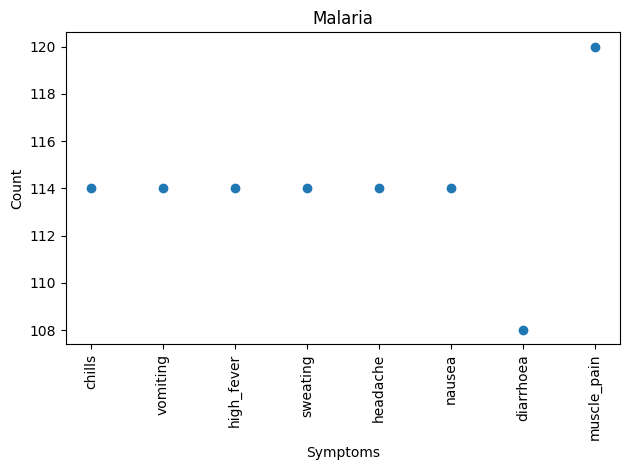

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['back_pain', 'joint_pain', 'muscle_pain', 'hip_joint_pain', 'stiff_neck']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


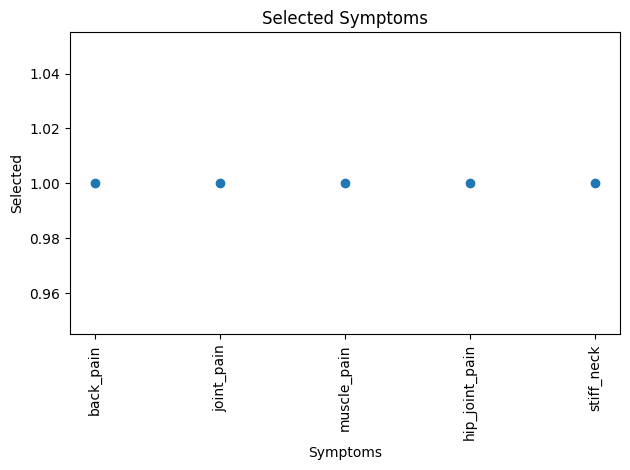

[114 114 114 114 114 114 108 120]
8
8


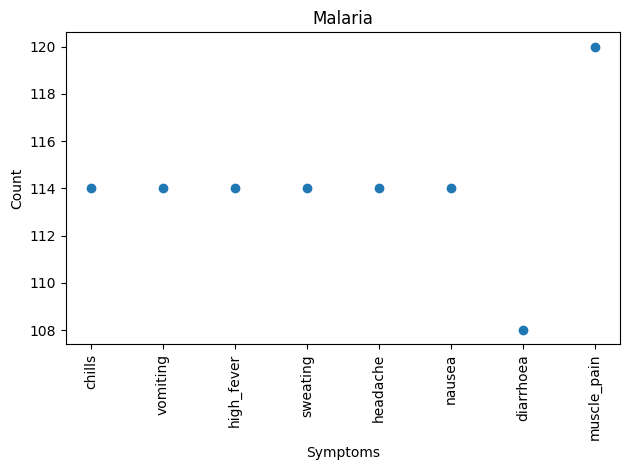

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['back_pain', 'joint_pain', 'muscle_pain', 'hip_joint_pain', 'stiff_neck']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


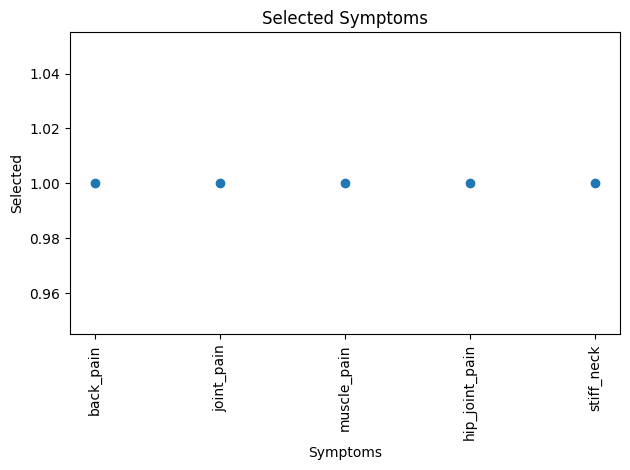

[114 114 114 114 114 114 108 120]
8
8


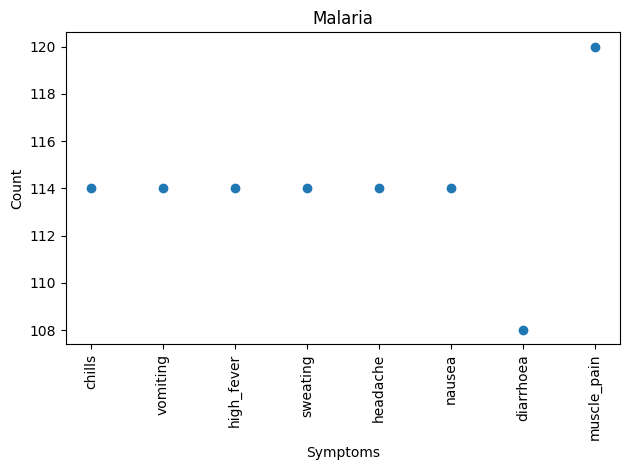

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['back_pain', 'joint_pain', 'muscle_pain', 'hip_joint_pain', 'stiff_neck']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


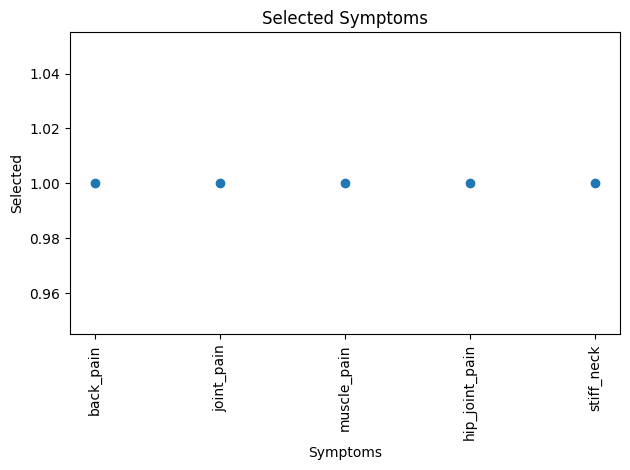

[114 114 114 114 114 114 108 120]
8
8


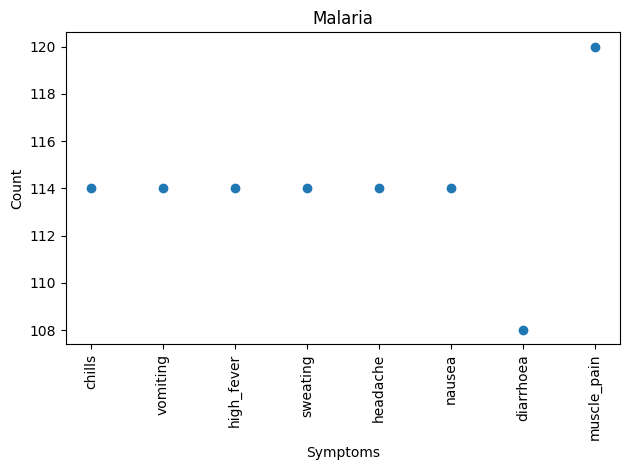

Decision Tree
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['back_pain', 'joint_pain', 'muscle_pain', 'hip_joint_pain', 'stiff_neck']
[1, 1, 1, 1, 1]


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


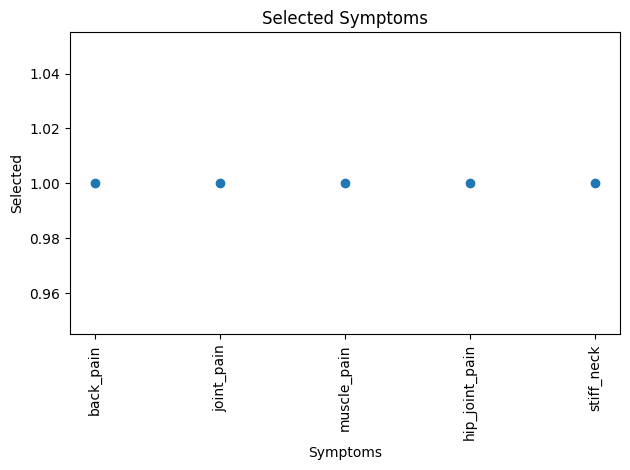

[114 114 114 114 114 114 108 120]
8
8


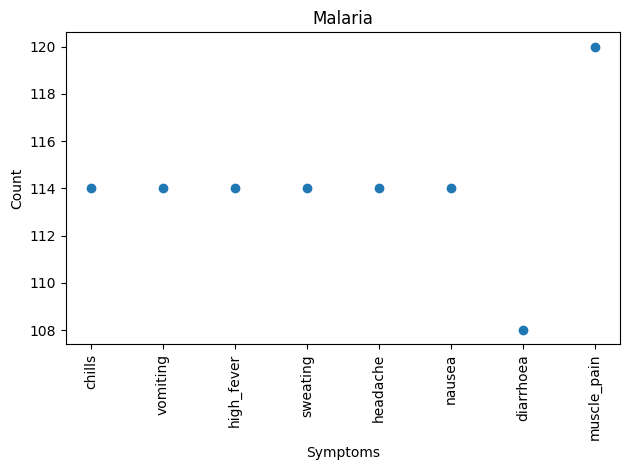

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[114 114 114 114 114 114 108 120]
8
8


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


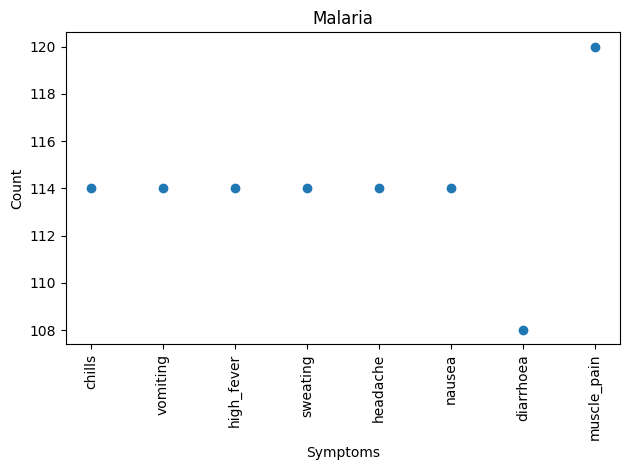

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[114 114 114 114 114 114]
6
6


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


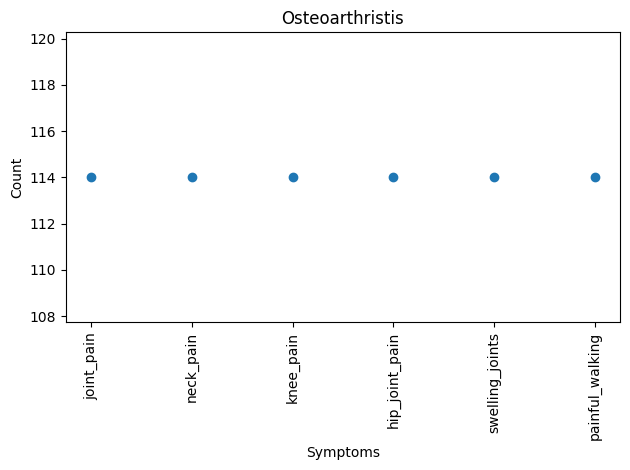

Random Forest
Accuracy
1.0
41.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[114 114 114 114 114 114 108 120]
8
8


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


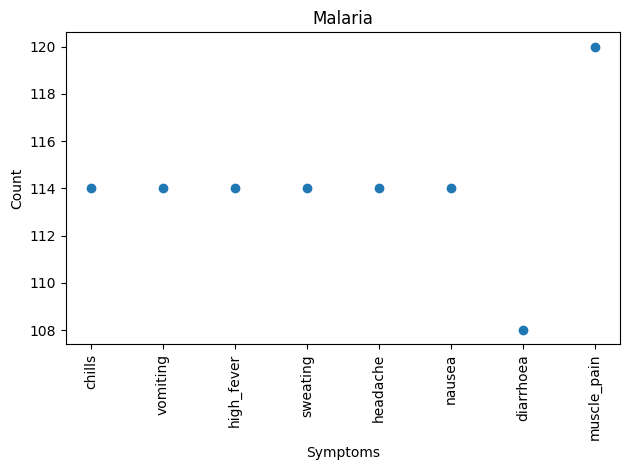

In [35]:
#calling this function because the application is ready to run
root.mainloop()